In [ ]:
import tensorflow.keras as keras
from tensorflow.keras import backend as K
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
 
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers

In [ ]:
Y =  np.load("/content/drive/MyDrive/shared/nets/leabra/y_15.npy")
X = np.load("/content/drive/MyDrive/shared/nets/leabra/x_15.npy")
input_shape = X[0].shape
output_shape = Y.shape[1]

'''
#This uses the preprocessing library to import images. 
#while it is more convienent, it seems to bring up issues with initializaiton of the model.

img_size = (200,200)
datagen = image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=False,
    validation_split=0.2
)

train = datagen.flow_from_directory(
    "/content/drive/MyDrive/shared/nets/leabra/",
    target_size=img_size,
    color_mode="grayscale",
    classes=None,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=None,
    subset="training",
)

test = datagen.flow_from_directory(
    "/content/drive/MyDrive/shared/nets/leabra/",
    target_size=img_size,
    color_mode="grayscale",
    classes=None,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=None,
    subset="validation",
)

# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/DirectoryIterator#__getitem__
input_shape = train.__getitem__(0)[0][0].shape
output_shape = train.__getitem__(0)[1][0].shape[0]
'''

print(input_shape)
print(output_shape)

(100, 100, 1)
2


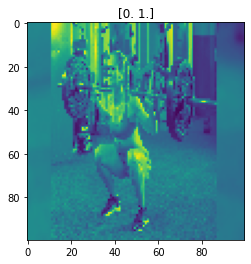

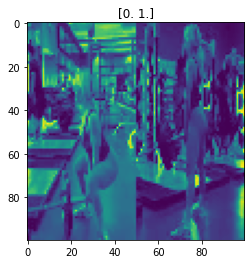

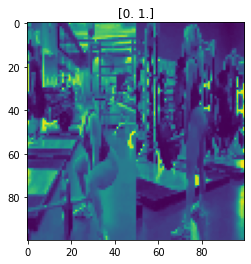

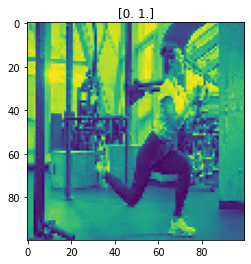

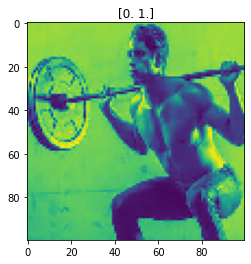

In [ ]:
    for i in range(5):
        #plt.imshow(image.array_to_img(train.__getitem__(0)[0][i]))
        #plt.title(str(train.__getitem__(0)[1][i]))
        plt.imshow(image.array_to_img(X[i,:,:,:]))
        plt.title(str(Y[i]))
        plt.show()

In [1]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(512, kernel_size=(6,6),
 activation='relu',
 input_shape=input_shape))

#model.add(keras.layers.Conv2D(256, (4,4), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(4,4)))
model.add(keras.layers.Dropout(0.7))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(output_shape, activation='softmax'))
 
model.compile(loss=keras.losses.CategoricalCrossentropy(),
 optimizer=keras.optimizers.Adam(),
 metrics=[keras.metrics.CategoricalAccuracy()])
 
model.summary()

NameError: ignored

In [ ]:
'''
data_augmentation = keras.Sequential(50
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
 
    ])
 
classes = 2
inputs = keras.Input(shape=input_shape)
 
# Augment images
x = data_augmentation(inputs)
 
# Rescale image valuesY =  np.load("/content/drive/MyDrive/shared/nets/leabra/y_15.npy")
X = np.load("/content/drive/MyDrive/shared/nets/leabra/x_15.npy")
input_shape = X[0].shape
output_shape = Y.shape[1]



#x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
 32
# Add the rest of the model
outputs = layers.Conv2D(288, kernel_size=(5,5), activation='relu', input_shape=input_shape)(x)
#outputs = layers.BatchNormalization()(outputs)
#outputs = layers.Conv2D(512, (4,4), activation='relu')(outputs)model
#outputs = layers.BatchNormalization()(outputs)
outputs = layers.MaxPooling2D(pool_size=(2,2))(outputs)
outputs = layers.Dropout(0.4)(outputs)50
outputs = layers.Flatten()(outputs)
#outputs = layers.Dense(128, activation='relu')(outputs)
outputs = layers.Dense(64, activation='relu')(outputs)
outputs = layers.Dropout(0.5)(outputs)
outputs = layers.Dense(classes, activation='softmax')(outputs)
 
model = keras.Model(inputs, outputs)
 
model.compile(loss=keras.losses.CategoricalCrossentropy(),
                 optimizer=keras.optimizers.Adam(),
                 metrics=[keras.metrics.CategoricalAccuracy()])
model.summary()
 
keras.utils.plot_model(model,to_file='cnn-matt.png',
 show_shapes=True,expand_nested=True)
'''

'\ndata_augmentation = keras.Sequential(50\n    [\n        layers.experimental.preprocessing.RandomFlip("horizontal"),\n        layers.experimental.preprocessing.RandomRotation(0.3),\n \n    ])\n \nclasses = 2\ninputs = keras.Input(shape=input_shape)\n \n# Augment images\nx = data_augmentation(inputs)\n \n# Rescale image valuesY =  np.load("/content/drive/MyDrive/shared/nets/leabra/y_15.npy")\nX = np.load("/content/drive/MyDrive/shared/nets/leabra/x_15.npy")\ninput_shape = X[0].shape\noutput_shape = Y.shape[1]\n\n\n\n#x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)\n 32\n# Add the rest of the model\noutputs = layers.Conv2D(288, kernel_size=(5,5), activation=\'relu\', input_shape=input_shape)(x)\n#outputs = layers.BatchNormalization()(outputs)\n#outputs = layers.Conv2D(512, (4,4), activation=\'relu\')(outputs)model\n#outputs = layers.BatchNormalization()(outputs)\noutputs = layers.MaxPooling2D(pool_size=(2,2))(outputs)\noutputs = layers.Dropout(0.4)(outputs)50\noutputs = l

In [ ]:
batch_size = 30
epochs = 100
history = model.fit(X,Y,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 validation_split=0.2
 #validation_data=test
 )

Epoch 1/100
25/25 [==============================] - 3s 96ms/step - loss: 3.5395 - categorical_accuracy: 0.4985 - val_loss: 1.2846 - val_categorical_accuracy: 0.1848
Epoch 2/100
25/25 [==============================] - 2s 90ms/step - loss: 0.6580 - categorical_accuracy: 0.5997 - val_loss: 0.7881 - val_categorical_accuracy: 0.4239
Epoch 3/100
25/25 [==============================] - 2s 90ms/step - loss: 0.6473 - categorical_accuracy: 0.6499 - val_loss: 0.9938 - val_categorical_accuracy: 0.2283
Epoch 4/100
25/25 [==============================] - 2s 90ms/step - loss: 0.6263 - categorical_accuracy: 0.6698 - val_loss: 0.7628 - val_categorical_accuracy: 0.4511
Epoch 5/100
25/25 [==============================] - 2s 90ms/step - loss: 0.5708 - categorical_accuracy: 0.7064 - val_loss: 0.7082 - val_categorical_accuracy: 0.5217
Epoch 6/100
25/25 [==============================] - 2s 90ms/step - loss: 0.5451 - categorical_accuracy: 0.7399 - val_loss: 0.7888 - val_categorical_accuracy: 0.4348
Epoc

Test loss: 0.6123878955841064
Test accuracy: 0.9412404894828796


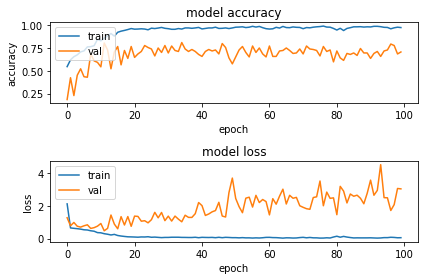

In [ ]:
score = model.evaluate(X,Y, verbose = 0)
print("Test loss:", score[0])
print("Test accuracy:",score[1])

plt.figure(1) 

# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.show()

### Verify the predictions being made
---

In [ ]:
# Decode predictions didn't seem to work so well when not using
# xception network. This function should decode objects with 2 classes [0,1]
"""30

def decoder(one_pred):
    if one_pred[0] > one_pred[1]:
        return np.float32([1,0])
    else:
        return [0,1]

num_items = len(Y)
squat_preds = first_model.predict(X[0:num_items,:,:,:])

decoded = np.apply_along_axis(decoder, 1, squat_preds)

incorrect_squats = []
incorrect_non_squats = []
for i in range(100):
    if np.array_equal(decoded[i],Y[i]) == False:
        if Y[i][0] == 1:
            incorrect_non_squats.append(i)
        elif Y[i][1] == 0:
            incorrect_squats.append(i)

for i in incorrect_non_squats:
    plt.imshow(image.array_to_img(X[i,:,:,:])) 
    plt.show()
    
# No cats classified incorrectly

for i in incorrect_non_squats:
    plt.imshow(image.array_to_img(X[i,:,:,:])) 
    plt.show()
"""

'30\n\ndef decoder(one_pred):\n    if one_pred[0] > one_pred[1]:\n        return np.float32([1,0])\n    else:\n        return [0,1]\n\nnum_items = len(Y)\nsquat_preds = first_model.predict(X[0:num_items,:,:,:])\n\ndecoded = np.apply_along_axis(decoder, 1, squat_preds)\n\nincorrect_squats = []\nincorrect_non_squats = []\nfor i in range(100):\n    if np.array_equal(decoded[i],Y[i]) == False:\n        if Y[i][0] == 1:\n            incorrect_non_squats.append(i)\n        elif Y[i][1] == 0:\n            incorrect_squats.append(i)\n\nfor i in incorrect_non_squats:\n    plt.imshow(image.array_to_img(X[i,:,:,:])) \n    plt.show()\n    \n# No cats classified incorrectly\n\nfor i in incorrect_non_squats:\n    plt.imshow(image.array_to_img(X[i,:,:,:])) \n    plt.show()\n'